In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import sklearn

In [6]:
from main import *

In [7]:
#Separamos en train y test
X = df3.drop(columns=['id_producto','label'], axis=1)
Y = df3['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [15]:
#Lanzamos el modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [14]:

print("Train score", gnb.score(X_train,y_train))
print("Test score", gnb.score(X_test, y_test))
# train
y_pred=gnb.predict(X_train)
probs=gnb.predict_proba(X_train)
print("Train AUC", sklearn.metrics.roc_auc_score(y_train, probs[:,1]))
print("Train Accuracy", sklearn.metrics.accuracy_score(y_train,y_pred))
# test
y_pred=gnb.predict(X_test)
probs=gnb.predict_proba(X_test)
print("Test AUC", sklearn.metrics.roc_auc_score(y_test, probs[:,1]))
print("Test Accuracy",  sklearn.metrics.accuracy_score(y_test,y_pred))

Train score 0.7048436506560315
Test score 0.7048228115465853
Train AUC 0.8384578552144613
Train Accuracy 0.7048436506560315
Test AUC 0.8368843263845218
Test Accuracy 0.7048228115465853


In [16]:
#La probabilidad a priori de pertenecer a cada clase
gnb.class_prior_  

array([0.9, 0.1])

In [191]:
#Probabilidad que tiene cada licitación de pertenecer a cada clase
prob= pd.DataFrame(gnb.predict_proba(X_test))



In [224]:
#Creamos un df de nuestro Y_test, reseteamos index para cuando al concatenarlo no nos arroje NANs
y_real= pd.DataFrame(y_test).reset_index()
y_real.drop(columns=['index'], inplace=True)

In [192]:
#fusionamos nuestras dos columnas por su index
prob= pd.merge(prob, label, left_index=True, right_index=True)


In [193]:
prob

,0,1,label
0,1.000000e+00,0.0,0
1,1.257069e-160,1.0,1
2,1.000000e+00,0.0,0
3,1.000000e+00,0.0,0
4,1.000000e+00,0.0,0
...,...,...,...
17039,1.000000e+00,0.0,0
17040,3.395885e-107,1.0,1
17041,3.071706e-73,1.0,0
17042,1.000000e+00,0.0,0


In [220]:
#Aciertos del y_test
prob[prob["label"] == 1]

,0,1,label
1,1.257069e-160,1.0,1
13,1.991946e-136,1.0,1
24,1.886862e-149,1.0,1
31,2.945603e-92,1.0,1
45,5.220049e-141,1.0,1
...,...,...,...
16975,8.414155e-116,1.0,1
16994,2.375948e-120,1.0,1
16995,3.727249e-144,1.0,1
17023,6.804503e-90,1.0,1


In [200]:
#Observamos la probabilidad de 1 cuando acierta un 100%
prob[prob[1] == 1].count()

0        6587
1        6587
label    6587
dtype: int64

In [196]:
# 1 cuando la probabilidad es < 0.70

prob[prob[1] < 0.7].count()

0        10295
1        10295
label    10295
dtype: int64

In [17]:
confusion_matrix(y_test, gnb.predict(X_test))

array([[10255,  5005],
       [   26,  1758]], dtype=int64)

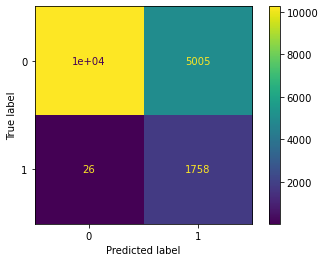

In [18]:
plot_confusion_matrix(gnb, X_test, y_test)

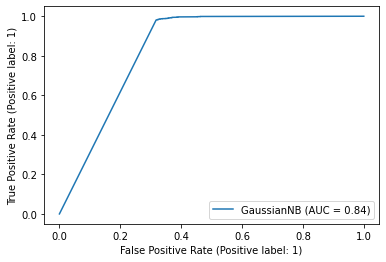

In [19]:
plot_roc_curve(gnb, X_test, y_test)

In [20]:
print(classification_report(y_test,y_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80     15260
           1       0.26      0.99      0.41      1784

    accuracy                           0.70     17044
   macro avg       0.63      0.83      0.61     17044
weighted avg       0.92      0.70      0.76     17044

